# Imports

In [2]:
%%capture
!pip install contractions

In [3]:
import ast
import codecs
import datetime
import math
import os
import re
import smtplib
import string
import time
from ast import literal_eval
from collections import Counter

import contractions
import gensim
import lxml
import nltk
import numpy as np
import pandas as pd
import requests
import scipy
import seaborn as sns
import spacy
import tensorflow as tf
from bs4 import BeautifulSoup
from lxml.html.clean import Cleaner
from matplotlib import font_manager
from matplotlib import pyplot as plt
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from numpy.linalg import norm
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tqdm.auto import tqdm
from wordcloud import WordCloud

tqdm.pandas()

In [4]:
nltk.download(["punkt", "stopwords", "wordnet", "words"], quiet=True)

True

In [5]:
stopwords = stopwords.words("english")

In [7]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


# Data preparation

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
stop = set(stopwords + list(string.punctuation))

In [ ]:
start = '<style type="text/css">'
end = "</style>"

In [ ]:
cleaner = Cleaner()
cleaner.javascript = (
    True  # This is True because we want to activate the javascript filter
)
cleaner.style = True

Already extracted text. So, we do not need the 2 cells below

In [ ]:
df = pd.DataFrame(columns=["folder_name", "file_name", "Text"])

In [ ]:
Q = os.listdir(
    "/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/unzipped media/media/crawled/"
)
for i in range(0, len(Q)):
    files = os.listdir(
        "/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/unzipped media/media/crawled/"
        + Q[i]
    )
    for f in files:
        if f.endswith(".html"):
            Url = str(
                "/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/unzipped media/media/crawled/"
                + Q[i]
                + "/"
                + f
            )
            header = {
                "Referer": Url,
                "User-Agent": "Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36",
            }
            print(Url)
            files = codecs.open(Url, "r", "ISO-8859-1")
            Soup1 = BeautifulSoup(files.read())
            text = Soup1.get_text()
            Soup1 = str(Soup1)
            # print(Soup1)

            soup = BeautifulSoup(Soup1, "html.parser")
            text2 = ""

            # print('soup:',soup)
            t = soup.findAll("title")
            # print('t:',t)
            for title in t:
                text2 += " " + title.text
            # b , em , footer , span , th, u

            h1 = soup.findAll("h1")
            for h in h1:
                text2 += " " + h.text

            h2 = soup.findAll("h2")
            for h in h2:
                text2 += " " + h.text

            h3 = soup.findAll("h3")
            for h in h3:
                text2 += " " + h.text

            h4 = soup.findAll("h4")
            for h in h4:
                text2 += " " + h.text

            p = soup.findAll("p")
            for h in p:
                text2 += " " + h.text

            title = soup.findAll("meta", property="title")
            for h in title:
                text2 += " " + h.text

            description = soup.findAll("meta", property="description")
            for h in description:
                text2 += " " + h.text

            title = soup.findAll("meta", property="og:title")
            for h in title:
                text2 += " " + h.text

            description = soup.findAll("meta", property="og:description")
            for h in description:
                text2 += " " + h.text

            tag = soup.findAll("meta", property="article:tag")
            for h in tag:
                text2 += " " + h.text

            # em = soup.findAll('em')
            # for h in em:
            #   text2 +=  ' ' + h.text

            # b = soup.findAll('b')
            # for h in b:
            #   text2 +=  ' ' + h.text

            # u = soup.findAll('u')
            # for h in u:
            #   text2 +=  ' ' + h.text

            # span = soup.findAll('span')
            # for h in span:
            #   text2 +=  ' ' + h.text

            # footer = soup.findAll('footer')
            # for h in footer:
            #   text2 +=  ' ' + h.text

            # th = soup.findAll('th')
            # for h in th:
            #   text2 +=  ' ' + h.text
            # tags we want to fetch data from :
            # title, h , p

            # text = text.replace(Soup1[Soup1.find(start)+len(start):Soup1.rfind(end)],"")
            # print('text2:',text2)
            text = str(text2.strip())
            text_processed = [t for t in word_tokenize(text.lower()) if t not in stop]
            # print('text processed:',text_processed)
            df.loc[len(df)] = [Q[i], f, " ".join(text_processed)]

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/unzipped media/media/crawled/zh-cn.facebookcorewwwi.onion/C4F71DE1EDDCB0j92L3CF7n9C5D8C.html
/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/unzipped media/media/crawled/zh-cn.facebookcorewwwi.onion/1DB13pF9B996D5BDGB95C00A7AD4.html
/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/unzipped media/media/crawled/zh-cn.facebookcorewwwi.onion/BFG128D927BEB0DF64EA0899A22.html
/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/unzipped media/media/crawled/zh-cn.facebookcorewwwi.onion/A0Jo21BEF793081C8D3B10AD10B9A.html
/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/unzipped media/media/crawled/zh-cn.facebookcorewwwi.onion/L2p08803D8E4A3BD5KC7CA9AC0.html
/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/unzipped media/media/crawled/zh-cn.faceb

In [ ]:
df[["file_name", "page"]]

In [ ]:
words = set(nltk.corpus.words.words())

In [ ]:
stopset = stopwords.words("english") + list(string.punctuation)

In [ ]:
sent = "this is a sentence café a ofc nope Comment ça va de \x88í\x95\x98ê¸°ì\x9d´ë\x8f\x99ì\x9d"
sent = sent.encode("ascii", "ignore")
sent = sent.decode()
word_list = set(word_tokenize(sent))
temp = ""
for word in word_list:
    word = word.lower()
    if (len(word) >= 3) and (word in words) and (word not in stopset):
        temp = temp + " " + word
temp = temp.strip()
temp

In [ ]:
for i in range(0, len(df)):
    sent = df.iloc[i, 2]
    print(sent)
    sent = sent.encode("ascii", "ignore")
    sent = sent.decode()
    word_list = word_tokenize(sent)
    # print('original sent',sent)
    temp = ""
    for word in word_list:
        word = word.lower()
        if (len(word) > 3) and (word in words) and (word not in stopset):
            temp = temp + " " + word
    temp = temp.strip()
    # print('mod sent',sent)
    df.iloc[i, 2] = temp
    # print('modified sent',df.iloc[i,2])

In [ ]:
excluded_tags = {"ADV"}
nlp = spacy.load("en_core_web_sm")

In [ ]:
for i in range(len(df)):
    sent = df.iloc[i, 2]
    temp = ""
    for token in nlp(sent):
        if token.pos_ not in excluded_tags:
            temp = temp + " " + token.text
    temp = temp.strip()
    df.iloc[i, 2] = temp

In [ ]:
df = df[df["Text"].notna()]

In [ ]:
df = df[df["Text"] != ""]

In [ ]:
df.to_csv("temp3.csv")

# TF-IDF 

In [ ]:
text_req = df["Text"].to_list()

In [ ]:
def tf_idf(corpus, document):
    total_docs = len(corpus)
    # print(total_docs)
    doc_set = corpus[document].split(" ")
    # print(total_docs)
    # print(doc)
    words = corpus[document].split()
    wfreq = [words.count(w) for w in words]
    tf_idf = dict(list(zip(words, wfreq)))
    # print(tf_idf)
    for term in doc_set:
        if term:
            tf_idf[term] = 1 + math.log2(tf_idf[term])
            # print('indi word:',term)
            # print(tf_idf)
            idf_docs = []
            # idf_docs=[w for w in corpus if i in w]
            for doc in corpus:
                # print('doc',doc)
                if term in doc:
                    idf_docs.append(doc)
            tf_idf[term] = math.log2(total_docs / len(idf_docs)) * tf_idf[term]
    return tf_idf

In [ ]:
weights = []

In [ ]:
for i in range(0, df.shape[0]):
    # print(i)
    dict_tfidf = tf_idf(text_req, i)
    # print(dict_tfidf)
    weights.append(dict_tfidf)

In [ ]:
df["weights"] = weights

In [ ]:
df.to_csv("temp4.csv")

In [ ]:
a = pd.DataFrame(
    sorted(
        list(dict(Counter(df["gl"].sum())).items()), key=lambda i: i[1], reverse=True
    ),
    columns=["label", "count"],
)
sns.barplot(data=a, x="label", y="count")
plt.xticks(rotation=90)
plt.show()  # path = '/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/preprocessed-data.csv'

# with open(path, 'w', encoding = 'utf-8-sig') as f:
#   df.to_csv(f)

In [ ]:
# path = '/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/preprocessed-data2.csv'

# with open(path, 'w', encoding = 'utf-8-sig') as f:
#   df.to_csv(f)

In [ ]:
# df = pd.read_csv('temp4.csv')

In [ ]:
# df.drop('Unnamed: 0',axis = 1,inplace = True)

# Extracting potential labels

In [ ]:
extracted_labels = []

In [ ]:
def extract_labels(row):
    # print(row)
    if isinstance(row, str):
        row = ast.literal_eval(row)

    temp = sorted(list(row.items()), key=lambda x: x[1], reverse=True)
    # print(temp)
    labels = []
    if len(temp) <= 6:
        no_iter = 6
    if len(temp) >= 20:
        no_iter = 0.45 * len(temp)
    else:
        no_iter = 0.7 * len(temp)
    i = 1
    for item in temp:
        labels.append(item[0])
        if i >= no_iter:
            break
        i = i + 1
    extracted_labels.append(labels)

In [ ]:
df["weights"].apply(extract_labels)

In [ ]:
df["extracted_labels"] = extracted_labels

In [ ]:
path = "/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/preprocessed-data4.csv"

with open(path, "w", encoding="utf-8-sig") as f:
    df.to_csv(f)

# Generalizing keywords into labels

In [10]:
df = pd.read_csv(
    "/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/preprocessed-data4.csv"
)

In [11]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [12]:
def tokenize(text):
    # text = literal_eval(text)
    # text = ' '.join(text)
    text = text.lower()
    text = contractions.fix(text)
    tokens = []
    for token in word_tokenize(text):
        if token not in stopwords and token.isalpha():
            tokens.append(token)

    return tokens


# df = pd.read_csv('/content/drive/MyDrive/preprocessed-data2.csv', usecols=['Text', 'extracted_labels'])
# df['labels'] = df.extracted_labels.apply(literal_eval)
df.rename({"Text": "page"}, axis=1, inplace=True)
# df.drop(['extracted_labels'], axis=1, inplace=True)
import multiprocessing

WORKERS = multiprocessing.cpu_count()
w2v = gensim.models.Word2Vec(size=300, window=5, min_count=1, workers=WORKERS)

# inp = df.apply(lambda i: tokenize(i['page'] + ' ' + " ".join(i['labels'])), axis=1)
inp = df["page"].apply(tokenize)

w2v.build_vocab(inp)
total_examples = w2v.corpus_count
w2v.intersect_word2vec_format(
    "/content/drive/MyDrive/Stance Detection from Text/Saved models/GoogleNews.bin",
    binary=True,
    lockf=1.0,
)

w2v.train(inp, total_examples=total_examples, epochs=5)

# w2v = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/stance_detection/GoogleNews-vectors-negative300.bin', binary=True)
EMBEDDING_DIM = 300

In [149]:
# w2v.wv.save('/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/word2vec.wordvectors')

In [ ]:
# w2v = gensim.models.KeyedVectors.load("word2vec.wordvectors", mmap='r')

In [13]:
df = df[df.apply(lambda row: len(row["page"]) > 0, axis=1)]

In [14]:
w2v.most_similar("onion")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('potato', 0.5756994485855103),
 ('everything', 0.5719113349914551),
 ('tomato', 0.5680567026138306),
 ('asparagus', 0.5296876430511475),
 ('system', 0.5273357033729553),
 ('alternative', 0.5074076056480408),
 ('package', 0.4958958029747009),
 ('except', 0.4948974847793579),
 ('vegetable', 0.48813027143478394),
 ('mango', 0.48652034997940063)]

In [ ]:
# text = ' '
# for i in df['extracted_labels']:
#   for j in i:
#     text = text +' ' + j

In [ ]:
# wordcloud_spam = WordCloud(background_color="black", max_words=300).generate(text)

# # Lines 2 - 5
# plt.figure(figsize = (20,20))
# plt.imshow(wordcloud_spam, interpolation='bilinear')
# plt.axis("off")
# plt.show()

In [18]:
output_tokens = [
    "web",
    "banking",
    "food",
    "security",
    "health",
    "network",
    "software",
    "education",
    "entertainment",
    "agriculture",
    "finance",
    "business",
    "nature",
    "governance",
    "politics",
    "sports",
    "technology",
    "blockchain",
    "literature",
    "shopping",
]
cyberseclist = [
    "hacker",
    "hacking",
    "firewall",
    "antivirus",
    "crptography",
    "encryption",
    "decryption",
    "skimmer",
]


def generalizeTokens(tokens):
    output = []
    tokens = literal_eval(tokens)
    #   print('tokens',tokens)
    for token in tokens:
        # print('token',token)
        solution = 0
        solution_token = None
        if token in cyberseclist:
            output.append("cybersecurity")
            # continue

        for matchToken in output_tokens:
            #   print('matchtoken',matchToken)
            try:
                # t = scipy.spatial.distance.cosine(w2v[matchToken], w2v[token])
                # t = w2v.wv.similarity(w2v[matchToken], w2v[token])
                t = np.dot(w2v[matchToken], w2v[token]) / (
                    norm(w2v[matchToken]) * norm(w2v[token])
                )
                # print(t)
                # if t<0.2:
                #   continue
                if solution <= t:
                    solution = t
                    solution_token = matchToken
            except:
                continue
        if solution_token is not None and solution > 0.6:
            #   print('solution token',solution_token)
            output.append(solution_token)

    return list(set(output))

In [22]:
df

,folder_name,file_name,page,weights,extracted_labels,gl
0,msydqstlz2kzerdg.onion,x1E4m82C6F4C185zF0ZB05E1CF.html,onion hidden project index access material cod...,"{'onion': 8.753572973561463, 'hidden': 5.32017...","['indexing', 'bundle', 'removed', 'material', ...",[network]
1,torlinksge6enmcyyuxjpjkoouw4oorgdgeo7ftnq3zodj...,10FBED7D1320DBBEJ10ADF0B41B3D.html,onion stalking livre community engine everythi...,"{'onion': 8.753572973561463, 'stalking': 12.09...","['tesseract', 'castellano', 'polska', 'mysteri...",[cybersecurity]
2,hss3uro2hsxfogfq.onion,9B00l8911012BD0279Ea98A5I3EF.html,want anonymous search text evil,"{'want': 5.756532349042007, 'anonymous': 8.160...","['evil', 'anonymous', 'text', 'want']",[technology]
3,he22pncoselnm54h.onion,d84G5E9D2023uEA0CfF822A3K96.html,green machine index,"{'green': 7.813945591540945, 'machine': 8.2248...","['machine', 'index', 'green']",[]
4,nare7pqnmnojs2pg.onion,0BbB8E8e3EqBA5C3CE819F2CAMF5.html,explaining news check board welcome waiting se...,"{'explaining': 12.68431031112435, 'news': 6.11...","['explaining', 'waiting', 'operator', 'automat...","[technology, network]"
...,...,...,...,...,...,...
26323,et-ee.facebookcorewwwi.onion,16A8D4E8140t97C63E2E9DF83978C.html,topic related meile,"{'topic': 7.291992888345589, 'related': 5.3805...","['meile', 'topic', 'related']",[]
26324,etrrdbuorwng2hkw.onion,96CBA1-8D28E0FE16u9E8BEDD7D924.html,receive happen seller fast everything safe del...,"{'receive': 3.586278228163822, 'happen': 8.876...","['unopened', 'wholesaler', 'retailer', 'shipme...","[technology, network]"
26325,eu-es.facebookcorewwwi.onion,u71586ADCE9C08D8CE8E3BsepgD8u.html,policy norma,"{'policy': 3.487093618014297, 'norma': 7.90295...","['norma', 'policy']",[security]
26326,eu-es.facebookcorewwwi.onion,B1dR02F8FF5FD01A7FFAFA1n8FF.html,persona,{'persona': 4.5679663498868806},['persona'],[]


In [ ]:
df["gl"] = df["extracted_labels"].apply(generalizeTokens)

In [24]:
df.to_csv(
    "/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/gl-entiredataset2.csv"
)

In [ ]:
# output_tokens = ['web', 'food', 'health', 'network', 'education', 'entertainment', 'development', 'agriculture', 'finance', 'business', 'nature', 'governance', 'politics', 'sports', 'technology','crypto','literature']

# def generalizeTokens2(tokens):
#   output = []
#   for token in tokens:
#     solution = 0
#     solution_token = None
#     for matchToken in output_tokens:
#       try:
#         t= w2v.wv.similarity(matchToken, token)
#         # t = scipy.spatial.distance.cosine(w2v[matchToken], w2v[token])
#         if solution >= t:
#           solution = t
#           solution_token = matchToken
#       except:
#         continue
#     if solution_token is not None:
#       output.append(solution_token)

#   return list(set(output))

In [ ]:
# df['gl2'] = df['labels'].apply(generalizeTokens2)

In [25]:
df[["file_name", "page", "extracted_labels", "gl"]]

,file_name,page,extracted_labels,gl
0,x1E4m82C6F4C185zF0ZB05E1CF.html,onion hidden project index access material cod...,"['indexing', 'bundle', 'removed', 'material', ...",[network]
1,10FBED7D1320DBBEJ10ADF0B41B3D.html,onion stalking livre community engine everythi...,"['tesseract', 'castellano', 'polska', 'mysteri...",[cybersecurity]
2,9B00l8911012BD0279Ea98A5I3EF.html,want anonymous search text evil,"['evil', 'anonymous', 'text', 'want']",[technology]
3,d84G5E9D2023uEA0CfF822A3K96.html,green machine index,"['machine', 'index', 'green']",[]
4,0BbB8E8e3EqBA5C3CE819F2CAMF5.html,explaining news check board welcome waiting se...,"['explaining', 'waiting', 'operator', 'automat...","[technology, network]"
...,...,...,...,...
26323,16A8D4E8140t97C63E2E9DF83978C.html,topic related meile,"['meile', 'topic', 'related']",[]
26324,96CBA1-8D28E0FE16u9E8BEDD7D924.html,receive happen seller fast everything safe del...,"['unopened', 'wholesaler', 'retailer', 'shipme...","[technology, network]"
26325,u71586ADCE9C08D8CE8E3BsepgD8u.html,policy norma,"['norma', 'policy']",[security]
26326,B1dR02F8FF5FD01A7FFAFA1n8FF.html,persona,['persona'],[]


In [ ]:
def literal_return(val):
    try:
        return ast.literal_eval(val)
    except:
        return []

In [ ]:
df["gl"] = df["gl"].apply(literal_return)

In [158]:
from collections import Counter

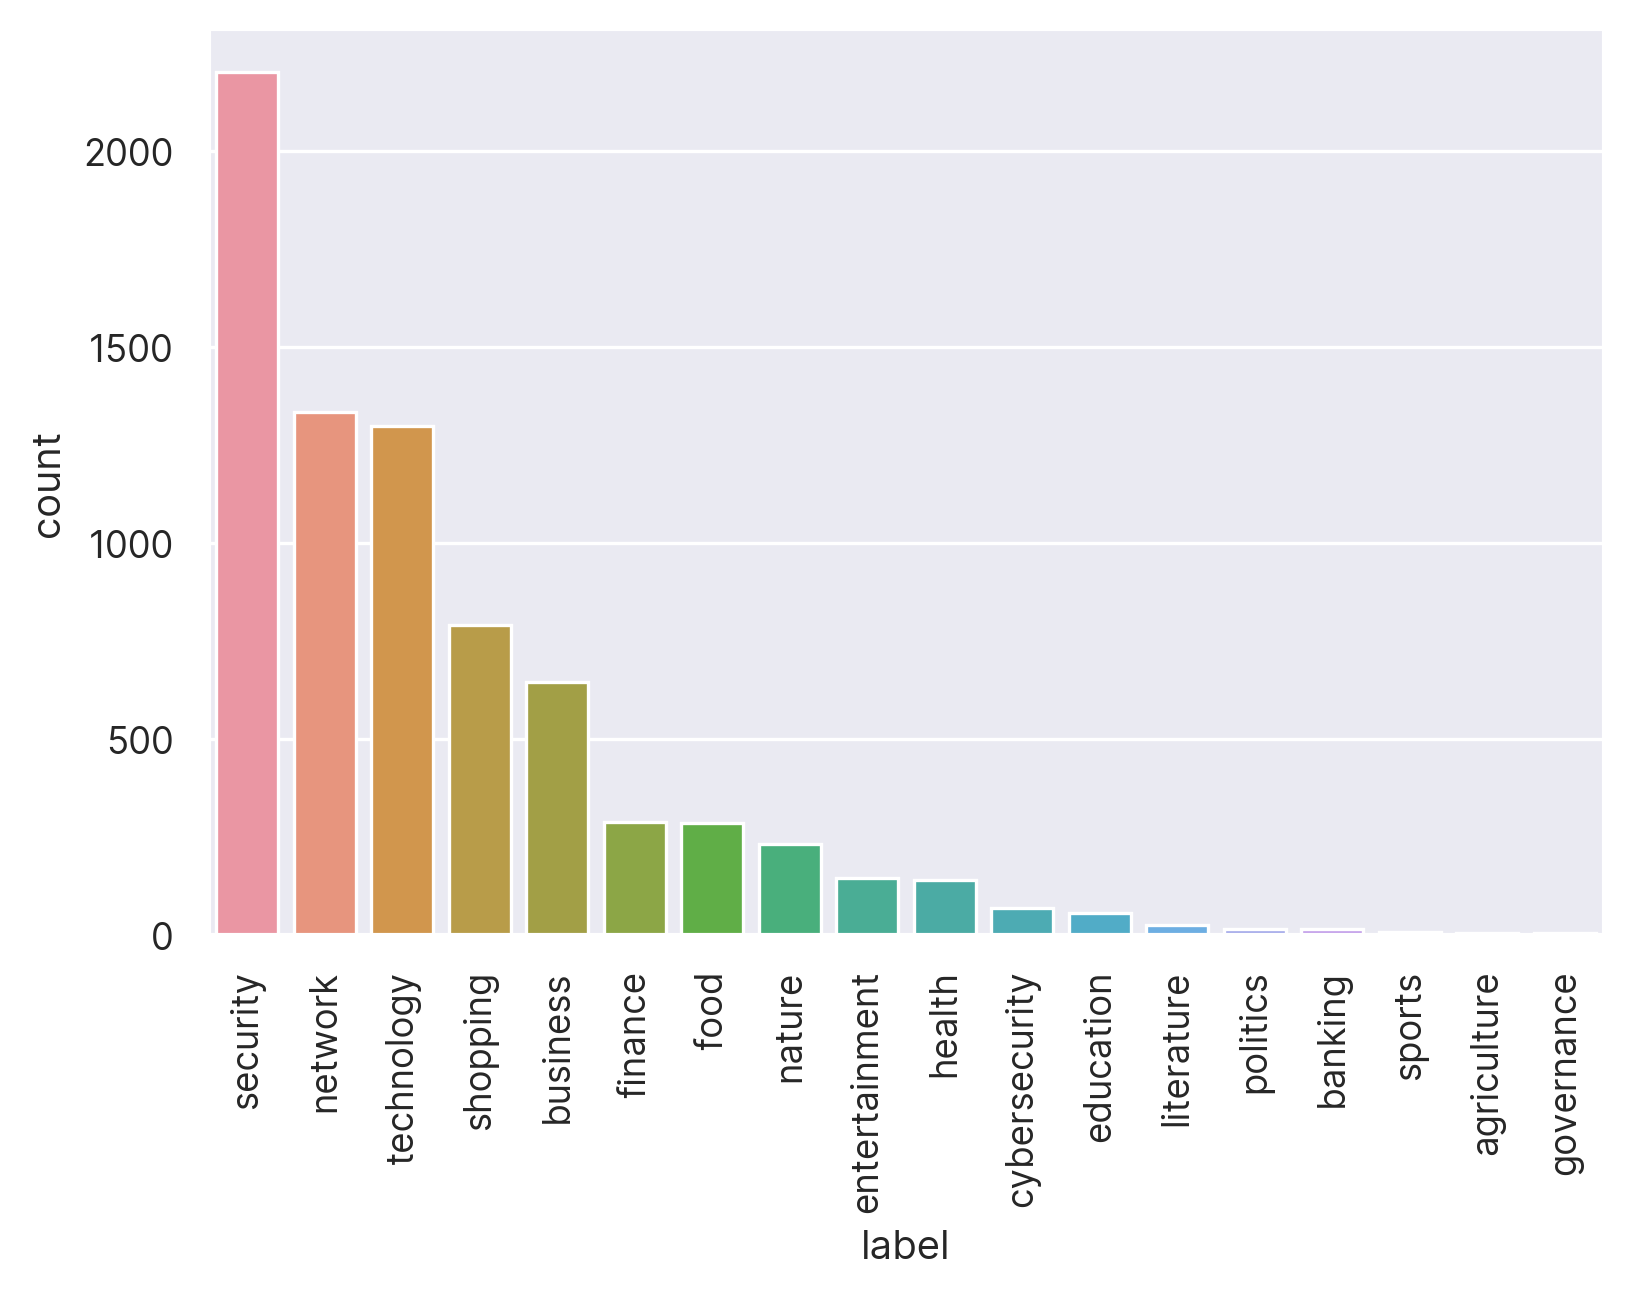

In [171]:
a = pd.DataFrame(
    sorted(
        list(dict(Counter(df["gl"].sum())).items()), key=lambda i: i[1], reverse=True
    ),
    columns=["label", "count"],
)
sns.barplot(data=a, x="label", y="count")
plt.xticks(rotation=90)
plt.show()

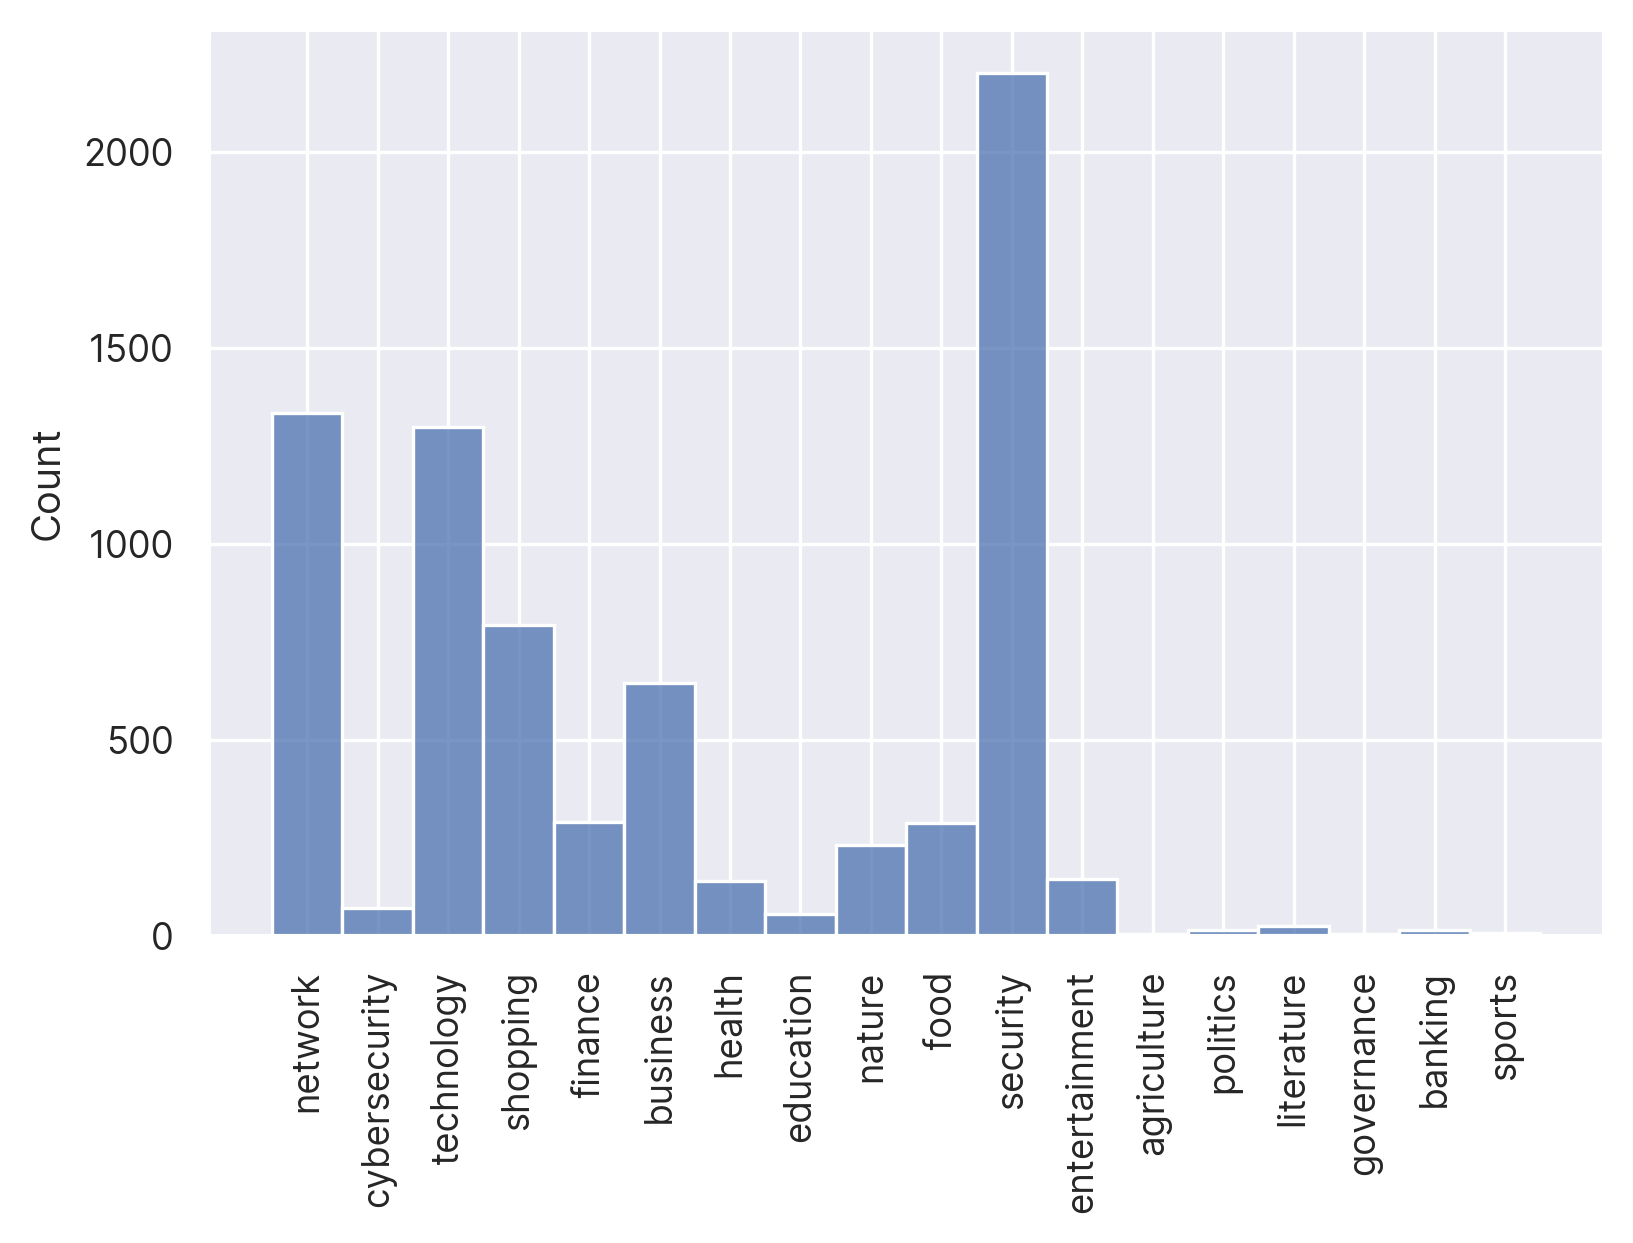

In [164]:
sns.histplot(df["gl"].sum())
plt.xticks(rotation=90)
plt.show()

# Classifier

## sklearn

In [28]:
clf = DecisionTreeClassifier(class_weight="balanced")

In [29]:
X = df["page"].apply(lambda x: word_tokenize(x))
X

0        [onion, hidden, project, index, access, materi...
1        [onion, stalking, livre, community, engine, ev...
2                    [want, anonymous, search, text, evil]
3                                  [green, machine, index]
4        [explaining, news, check, board, welcome, wait...
                               ...                        
26323                              [topic, related, meile]
26324    [receive, happen, seller, fast, everything, sa...
26325                                      [policy, norma]
26326                                            [persona]
26327        [policy, privacy, candidate, statement, data]
Name: page, Length: 26328, dtype: object

In [30]:
def embed(x):
    output = []
    for i in x:
        try:
            output.append(w2v[i])
        except:
            continue
    return output

In [31]:
X1 = X.copy()

In [32]:
X = X.apply(lambda x: np.sum(embed(x), axis=0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [ ]:
# X = np.stack(X)

In [33]:
data = list(zip(X, df["gl"]))

In [34]:
data = pd.DataFrame(data, columns=["Embedding", "Label(s)"])

In [35]:
data

,Embedding,Label(s)
0,"[6.1540346, -4.158105, -0.17015107, -3.2438838...",[network]
1,"[3.8951826, 1.8380034, 2.2823963, 4.7572594, -...",[cybersecurity]
2,"[2.0786562, -0.14365953, -0.8621814, 0.1105592...",[technology]
3,"[0.596226, -0.13830617, 0.66464615, -0.0767812...",[]
4,"[-3.1973448, -4.863712, 3.5744567, -0.6541956,...","[technology, network]"
...,...,...
26323,"[0.17931536, 0.3755894, 0.27431795, 0.57840323...",[]
26324,"[2.9978197, 3.0737724, -0.013933718, 3.0100155...","[technology, network]"
26325,"[-0.8510579, -0.25058514, 0.6041863, 1.0355945...",[security]
26326,"[0.5647197, 0.008363038, 0.04195861, 0.2750151...",[]


In [40]:
# data.to_csv('/content/drive/MyDrive/Projects/DB + Data/Generic - Hidden Wiki (28_10_20)/toUse(Embedding+Label(s)).csv')

In [36]:
data = data[data.apply(lambda row: len(row["Label(s)"]) > 0, axis=1)]

In [38]:
data.reset_index(inplace=True, drop=True)

In [39]:
data

,Embedding,Label(s)
0,"[6.1540346, -4.158105, -0.17015107, -3.2438838...",[network]
1,"[3.8951826, 1.8380034, 2.2823963, 4.7572594, -...",[cybersecurity]
2,"[2.0786562, -0.14365953, -0.8621814, 0.1105592...",[technology]
3,"[-3.1973448, -4.863712, 3.5744567, -0.6541956,...","[technology, network]"
4,"[3.9847624, -1.4023426, 2.9188576, 8.764416, -...","[network, shopping]"
...,...,...
6025,"[0.48402685, 0.41797662, -0.36945337, 0.271399...",[network]
6026,"[0.27154624, 0.8103166, -0.9104382, 1.5884085,...",[shopping]
6027,"[2.9978197, 3.0737724, -0.013933718, 3.0100155...","[technology, network]"
6028,"[-0.8510579, -0.25058514, 0.6041863, 1.0355945...",[security]


In [67]:
X = np.stack(data["Embedding"])
y = data["Label(s)"]

In [68]:
count_classes = len(set(y.sum()))

In [69]:
le = preprocessing.LabelEncoder()
le.fit(y.sum())
y = y.apply(le.transform)

In [70]:
mlb = MultiLabelBinarizer()

In [71]:
y = mlb.fit_transform(y)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [78]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

In [ ]:
# [le.inverse_transform(i) for i in mlb.inverse_transform(clf.predict(X_test))]

In [88]:
print((classification_report(y_test, clf.predict(X_test), target_names=le.classes_)))

               precision    recall  f1-score   support

  agriculture       0.00      0.00      0.00         1
      banking       1.00      0.40      0.57         5
     business       0.70      0.78      0.73       139
cybersecurity       0.40      0.67      0.50        18
    education       0.35      0.43      0.39        14
entertainment       0.70      0.77      0.73        30
      finance       0.49      0.56      0.52        62
         food       0.93      0.95      0.94        81
   governance       0.00      0.00      0.00         0
       health       0.86      0.65      0.74        37
   literature       1.00      0.75      0.86         8
       nature       0.96      0.90      0.93        50
      network       0.86      0.86      0.86       328
     politics       0.29      0.67      0.40         3
     security       1.00      1.00      1.00       548
     shopping       0.79      0.80      0.80       184
       sports       0.67      0.67      0.67         3
   techno

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## TensorFlow

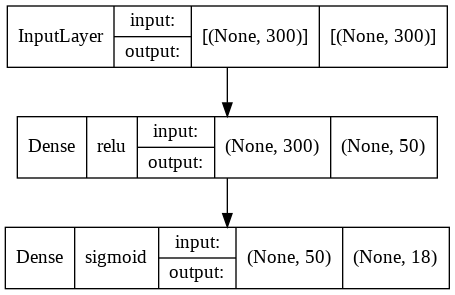

In [145]:
model = Sequential(name="classifier")
model.add(Dense(units=50, input_dim=300, activation="relu"))
model.add(Dense(units=count_classes, activation="sigmoid", name="output"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

tf.keras.utils.plot_model(
    model, show_layer_activations=True, show_layer_names=False, show_shapes=True
)

In [146]:
modelHist = model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_split=0.3,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor="val_loss", patience=10, restore_best_weights=True
        )
    ],
)

Epoch 1/100
99/99 [==============================] - 1s 6ms/step - loss: 0.6171 - accuracy: 0.4607 - val_loss: 0.2450 - val_accuracy: 0.6161
Epoch 2/100
99/99 [==============================] - 0s 3ms/step - loss: 0.2579 - accuracy: 0.6183 - val_loss: 0.2007 - val_accuracy: 0.6853
Epoch 3/100
99/99 [==============================] - 0s 4ms/step - loss: 0.1923 - accuracy: 0.6790 - val_loss: 0.1495 - val_accuracy: 0.6905
Epoch 4/100
99/99 [==============================] - 0s 4ms/step - loss: 0.1575 - accuracy: 0.7273 - val_loss: 0.1525 - val_accuracy: 0.7399
Epoch 5/100
99/99 [==============================] - 0s 4ms/step - loss: 0.1534 - accuracy: 0.7280 - val_loss: 0.1181 - val_accuracy: 0.7517
Epoch 6/100
99/99 [==============================] - 0s 3ms/step - loss: 0.1227 - accuracy: 0.7513 - val_loss: 0.1023 - val_accuracy: 0.7723
Epoch 7/100
99/99 [==============================] - 0s 4ms/step - loss: 0.1225 - accuracy: 0.7611 - val_loss: 0.1040 - val_accuracy: 0.7716
Epoch 8/100
9

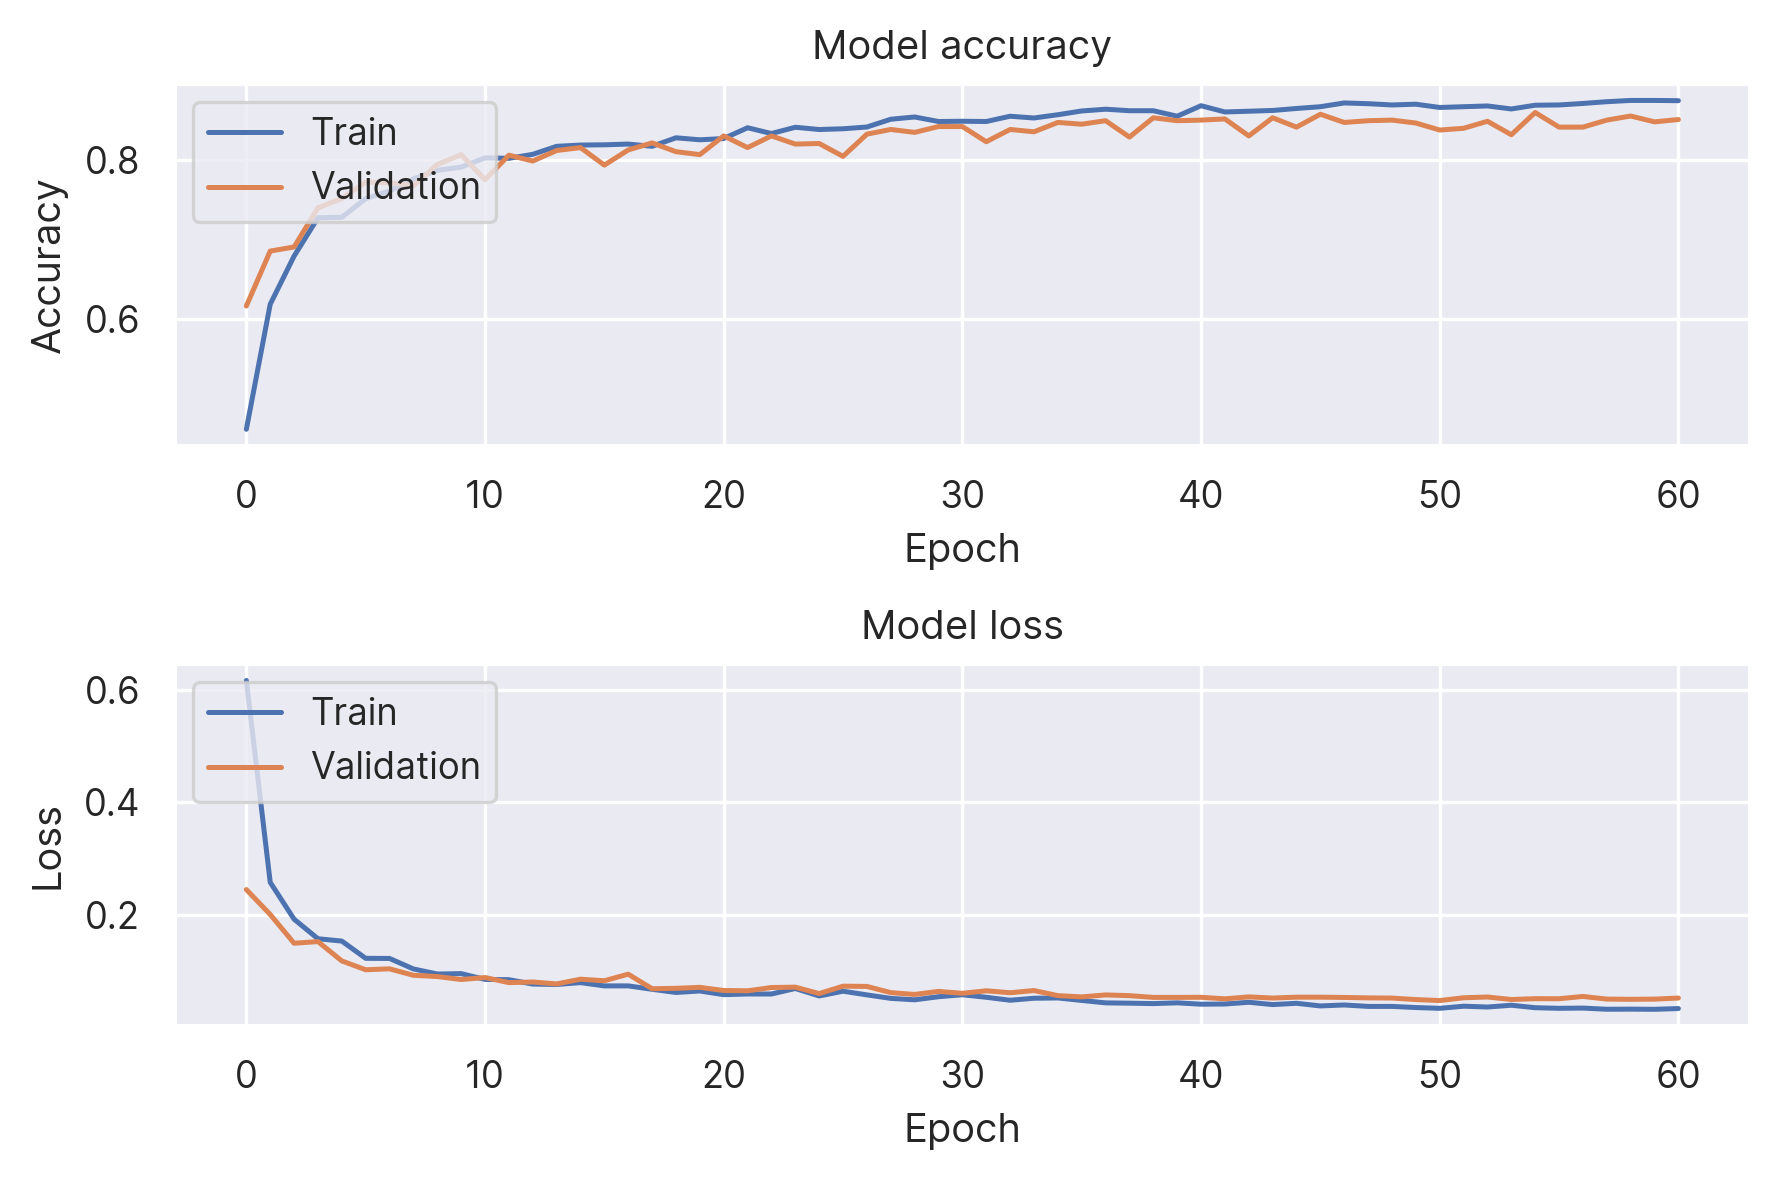

In [147]:
plt.subplot(2, 1, 1)
plt.plot(modelHist.history["accuracy"])
plt.plot(modelHist.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

plt.subplot(2, 1, 2)
plt.plot(modelHist.history["loss"])
plt.plot(modelHist.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")


plt.tight_layout(1)
plt.savefig("model_metrics.png", bbox_inches="tight")

In [ ]:
# plt.plot(modelHist.history['accuracy'])
# plt.plot(modelHist.history['loss'])
# plt.xlabel('Epoch')
# plt.legend(['Accuracy', 'Loss'], loc='upper left')


# plt.tight_layout(1)
# plt.savefig('model_metrics.png', bbox_inches='tight')

In [148]:
print(
    (
        classification_report(
            y_test, np.round(model.predict(X_test)), target_names=le.classes_
        )
    )
)

               precision    recall  f1-score   support

  agriculture       0.00      0.00      0.00         1
      banking       0.00      0.00      0.00         5
     business       0.86      0.80      0.83       139
cybersecurity       0.75      0.17      0.27        18
    education       0.71      0.36      0.48        14
entertainment       0.55      0.73      0.63        30
      finance       0.58      0.34      0.43        62
         food       0.99      0.90      0.94        81
   governance       0.00      0.00      0.00         0
       health       0.74      0.68      0.70        37
   literature       1.00      0.75      0.86         8
       nature       0.98      0.92      0.95        50
      network       0.91      0.84      0.87       328
     politics       0.00      0.00      0.00         3
     security       1.00      1.00      1.00       548
     shopping       0.79      0.82      0.80       184
       sports       0.00      0.00      0.00         3
   techno

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Flow